# Disector volumes
Read the newly counted disector volumes

In [21]:
#Load the data and set up notebook
import platform
import glob
import os
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [41]:
plt.rc('image', cmap='gray', interpolation='nearest')  # Display all images in b&w
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit
plt.rcParams['savefig.transparent'] = True  # Save figures with transparent background

In [2]:
# We copied everything from nas_schittny and the terastation to 'fast SSD'.
# Load the data from there
if 'debian' in platform.dist():
    drive = '/media/habi/Fast_SSD/'
else:
    drive = '\\\\anatera4\\'
# Load the data from this folder
RootPath = drive + os.path.join('Acini')
print('We are loading all the data from %s' % RootPath)

We are loading all the data from /media/habi/Fast_SSD/Acini


In [3]:
# Get a list of all the STEPanizer export files from Eveline
# Based on https://stackoverflow.com/a/14798263
StepanizerFiles_Eveline = sorted(glob.glob(os.path.join(RootPath, '**/*201[1234567]*.xls'), recursive=True))

In [4]:
print('Eveline counted the alveoli in %s acini' % len(StepanizerFiles_Eveline))

Eveline counted the alveoli in 287 acini


In [5]:
Eveline = pandas.DataFrame({'Location': StepanizerFiles_Eveline})
Eveline['Filename'] = [os.path.basename(f) for f in StepanizerFiles_Eveline]
Eveline['Beamtime'] = [os.path.dirname(f).split('Acini')[1].split(os.sep)[1] for f in StepanizerFiles_Eveline]
Eveline['Sample'] = [os.path.basename(f).split('-acinus')[0][1:] for f in StepanizerFiles_Eveline]
Eveline['Animal'] = [os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:3] for f in StepanizerFiles_Eveline]
Eveline['Day'] = [int(os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:2]) for f in StepanizerFiles_Eveline]
Eveline['Acinus'] = [int(os.path.basename(f).split('acinus')[1].split('_')[0]) for f in StepanizerFiles_Eveline]
Eveline['Counts'] = [int(pandas.read_csv(f, nrows=13, delimiter='\t')['Total'][10]) for f in StepanizerFiles_Eveline]

In [6]:
Eveline.groupby(by=['Day', 'Animal'])['Acinus'].describe()

count       mean        std   min    25%   50%    75%   max
Day Animal                                                             
4   04A      50.0  54.240000  22.463176  11.0  36.50  56.5  74.75  88.0
    04B      23.0  26.913043  10.413772   3.0  18.50  29.0  35.50  41.0
    04C      51.0  29.372549  18.909216   0.0  13.50  27.0  45.50  63.0
10  10A      27.0  26.703704  14.940433   2.0  13.50  25.0  39.00  53.0
    10B      14.0  22.285714  12.862758   4.0  12.50  20.0  31.25  43.0
    10C      17.0  40.647059  26.636303   1.0  20.00  38.0  61.00  86.0
21  21B      14.0  27.214286  17.742511   2.0  11.75  28.5  41.25  54.0
    21D      17.0  46.764706  30.173518   1.0  21.00  49.0  68.00  98.0
    21E      11.0  27.545455  18.468154   1.0  13.00  27.0  41.50  56.0
60  60B      24.0  15.500000  10.121007   0.0   7.50  14.5  24.50  31.0
    60C      20.0  11.850000   7.442941   0.0   5.75  12.5  17.25  24.0
    60D      10.0  13.400000   7.988881   3.0   7.50  12.5  18.75  26.0
    60E       9.0   8.444444   4.333333   2.0   6.00   8.0  12.00  14.0

In [7]:
# Get a list of *all* the excel files I counted are from the STEPanizer
# Differing to the ones from Eveline, we only have '2018' in the file name...
StepanizerFiles_David = sorted(glob.glob(os.path.join(RootPath, '**/*2018*.xls'), recursive=True))

In [8]:
print('David assessed the disector volume in %s acini' % len(StepanizerFiles_David))

David assessed the disector volume in 139 acini


In [9]:
David = pandas.DataFrame({'Location': StepanizerFiles_David})
David['Filename'] = [os.path.basename(f) for f in StepanizerFiles_David]
David['Beamtime'] = [os.path.dirname(f).split('Acini')[1].split(os.sep)[1] for f in StepanizerFiles_David]
David['Sample'] = [os.path.basename(f).split('-acinus')[0][1:] for f in StepanizerFiles_David]
David['Animal'] = [os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:3] for f in StepanizerFiles_David]
David['Day'] = [int(os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:2]) for f in StepanizerFiles_David]
David['Acinus'] = [int(os.path.basename(f).split('acinus')[1].split('_')[0]) for f in StepanizerFiles_David]

In [10]:
David.groupby(by=['Day', 'Animal'])['Acinus'].describe()

count       mean        std   min    25%   50%    75%   max
Day Animal                                                             
4   04A      21.0  47.666667  24.081805  11.0  26.00  47.0  74.00  83.0
    04B      13.0  24.461538  11.573068   3.0  16.00  26.0  34.00  40.0
    04C      25.0  29.160000  19.787791   0.0  12.00  26.0  47.00  63.0
10  10A      16.0  27.562500  15.547642   9.0  15.50  22.5  42.75  53.0
    10B       7.0  22.142857  15.699560   4.0  10.50  16.0  35.50  43.0
    10C       9.0  51.666667  23.457408  12.0  38.00  56.0  65.00  86.0
21  21B       8.0  22.375000  18.023298   2.0   9.50  15.5  42.00  46.0
    21D       9.0  36.222222  30.248049   1.0  16.00  30.0  58.00  91.0
    21E       4.0  41.750000  17.745892  16.0  37.75  47.5  51.50  56.0
60  60B      10.0  15.100000  11.209619   0.0   4.50  17.0  21.75  30.0
    60C      10.0  12.100000   7.950542   0.0   5.25  14.0  16.75  24.0
    60D       4.0  15.000000   8.640988   3.0  12.00  17.0  20.00  23.0
    60E       3.0   7.000000   4.582576   2.0   5.00   8.0   9.50  11.0

In [11]:
# Copied verbatim from ReadVolumeSurfaceAndAlveaolarNumber.py
DisectorThickness = 5  # slices
TOMCATPixelSize = 1.48   # um

In [12]:
DisectorVolume = pandas.DataFrame({'Location': StepanizerFiles_David})
DisectorVolume['Filename'] = [os.path.basename(f) for f in StepanizerFiles_David]
DisectorVolume['Animal'] = [os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:3] for f in StepanizerFiles_David]
DisectorVolume['Day'] = [int(os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:2]) for f in StepanizerFiles_David]
DisectorVolume['Beamtime'] = [os.path.dirname(f).split('Acini')[1].split(os.sep)[1] for f in StepanizerFiles_David]
DisectorVolume['Sample'] = [os.path.basename(f).split('-acinus')[0][1:] for f in StepanizerFiles_David]
DisectorVolume['Acinus'] = [int(os.path.basename(f).split('acinus')[1].split('_')[0]) for f in StepanizerFiles_David]
DisectorVolume['Counts'] = [int(pandas.read_csv(f, nrows=13, delimiter='\t')['Total'][10]) for f in StepanizerFiles_David]
DisectorVolume['Area per point'] = [float(pandas.read_csv(f, delimiter='\t', encoding='latin',
                                                           skiprows=28, header=None, usecols=[0,1],
                                                           nrows=1)[1][0])
                                     for f in StepanizerFiles_David]
DisectorVolume['Volume per point'] = [DisectorThickness * TOMCATPixelSize * 2 * ap
                                      for ap in DisectorVolume['Area per point']]
DisectorVolume['Number of images'] = [int(pandas.read_csv(f, delimiter='\t', encoding='latin',
                                                  skiprows=12, header=None, usecols=[0,1, 2, 3],
                                                  nrows=1)[2][0][2:])  # Stefan writes '->NumImg' into the cell, so we read only everything from string position 3 on...
                              for f in StepanizerFiles_David]
DisectorVolume['Disectorvolume'] = [vpp * cts for vpp, cts in zip(DisectorVolume['Volume per point'],
                                                                   DisectorVolume['Counts'])]

# Achtung, hier kommen plötzlich die Counts von Eveline rein!
# Wir müsssen zuerst die dataframes 'mergen'!
# DisectorVolume['Alveolar fraction'] = [cnts / tcv * 1e12 for tcv, cnts in
#                                         zip(DisectorVolume['Total counting volume'],
#                                             Eveline['Counts'])]

In [13]:
DisectorVolume.iloc[0]

Location            /media/habi/Fast_SSD/Acini/2009f/mrg/R108C60Dt...
Filename            _R108C60Dt-mrg-acinus03_2018-01-26_12-57_resul...
Animal                                                            60D
Day                                                                60
Beamtime                                                        2009f
Sample                                                  R108C60Dt-mrg
Acinus                                                              3
Counts                                                            526
Area per point                                                 141125
Volume per point                                          2.08866e+06
Number of images                                                   93
Disectorvolume                                            1.09863e+09
Name: 0, dtype: object

In [14]:
DisectorVolume.groupby(by=['Day', 'Animal'])['Counts'].describe()

count        mean         std    min     25%     50%      75%  \
Day Animal                                                                  
4   04A      21.0  191.666667  162.860472   74.0  125.00   130.0   200.00   
    04B      13.0  359.000000  154.287610  204.0  264.00   292.0   406.00   
    04C      25.0  290.320000  136.466028  116.0  207.00   242.0   347.00   
10  10A      16.0  276.250000   75.498786  153.0  213.25   285.5   342.25   
    10B       7.0  293.714286  138.958884   93.0  182.50   367.0   394.00   
    10C       9.0  282.000000  190.904426  110.0  176.00   218.0   305.00   
21  21B       8.0  482.750000  191.270004  201.0  384.75   463.0   597.00   
    21D       9.0  396.333333  359.106530  193.0  225.00   278.0   353.00   
    21E       4.0  433.500000   98.760653  324.0  386.25   424.0   471.25   
60  60B      10.0  747.900000  236.338481  407.0  630.25   788.0   832.50   
    60C      10.0  295.300000   73.081461  183.0  247.75   295.0   347.75   
    60D       4.0  661.750000   99.964577  526.0  622.75   681.0   720.00   
    60E       3.0  964.000000  147.553380  800.0  903.00  1006.0  1046.00   

               max  
Day Animal          
4   04A      838.0  
    04B      684.0  
    04C      745.0  
10  10A      379.0  
    10B      443.0  
    10C      723.0  
21  21B      738.0  
    21D     1333.0  
    21E      562.0  
60  60B     1189.0  
    60C      412.0  
    60D      759.0  
    60E     1086.0

In [47]:
# Merge 'Eveline' and 'David' so we know what is still to do
# Based on https://stackoverflow.com/a/33350050/323100
StillToDo = pandas.merge(Eveline, David,
                         on=['Animal', 'Acinus', 'Day', 'Beamtime', 'Sample'],
                         how='outer', suffixes=['_Eveline', '_David'],
                         indicator=True)
StillToDo = StillToDo[StillToDo._merge != 'both']
print('We still need to assess the disector volume in %s acini...' % len(StillToDo))

We still need to assess the disector volume in 149 acini...


In [48]:
# Merge 'Eveline' and 'David' so have the one we already did
# Based on https://stackoverflow.com/a/33350050/323100
Done = pandas.merge(Eveline, DisectorVolume,
                         on=['Animal', 'Acinus', 'Day', 'Beamtime', 'Sample'],
                         how='inner', suffixes=['_Eveline', '_David'],
                         indicator=True)
print('We have the data of %s acini...' % len(Done))

We have the data of 139 acini...


In [49]:
# Set ourselves a palette, based on the individual unique sample names
# The dictionary palette setting is based on the comments in https://stackoverflow.com/q/36554075/323100
ourcolors=seaborn.color_palette('husl', len(pandas.unique(Done.Animal)))
ourpalette = {animal:ourcolors[c] for c, animal in enumerate(pandas.unique(Done.Animal))}

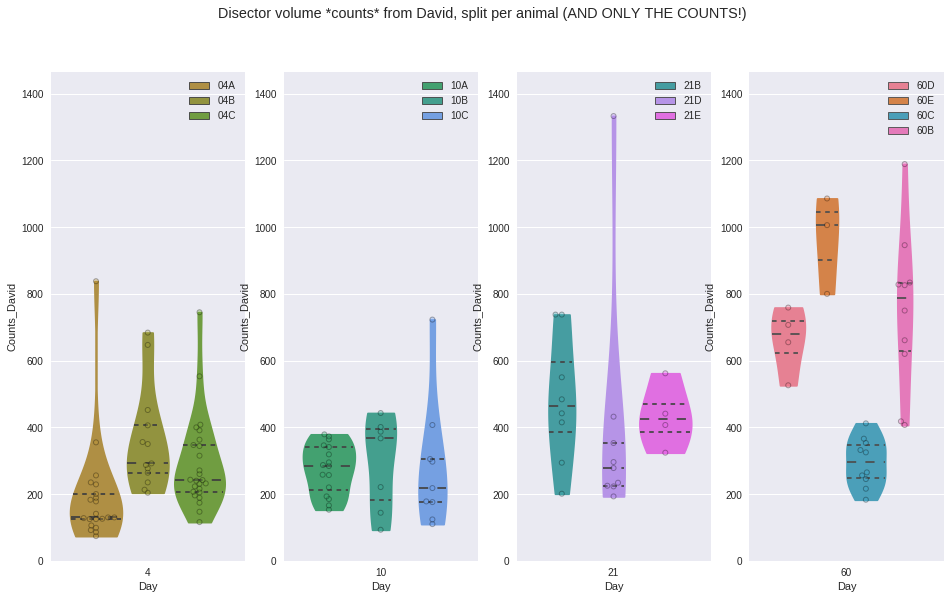

In [43]:
for c, d in enumerate(sorted(pandas.unique(Done.Day))):
    plt.subplot(1, len(pandas.unique(Done.Day)), c + 1)
    bxplt = seaborn.violinplot(data=Done.loc[Done.Day == d], x='Day', y='Counts_David',
                               hue='Animal', palette=ourpalette, cut=0, inner='quartiles')
    swrmplt = seaborn.swarmplot(data=Done.loc[Done.Day == d], x='Day', y='Counts_David', hue='Animal',
                                split=True, linewidth=1, palette=ourpalette, edgecolor='k', alpha=0.309)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.ylim([0, 1.1 * Done.Counts_David.max()])
    bxplt.legend(handles[:len(handles)//2], labels[:len(labels)//2], loc='upper right')    
plt.suptitle('Disector volume *counts* from David, split per animal (AND ONLY THE COUNTS!)')
# plt.savefig(os.path.join(imgdir, 'counts_day.png'), bbox_inches='tight')
plt.show()

In [51]:
# Get last image file
StillToDo['LastFile'] = [os.path.basename(sorted(glob.glob(os.path.join(os.path.dirname(location),
                                                                         '*_??_b.jpg')))[-1]) for
                          location in StillToDo.Location_Eveline]

In [52]:
StillToDo.head()

,Location_Eveline,Filename_Eveline,Beamtime,Sample,Animal,Day,Acinus,Counts,Location_David,Filename_David,_merge,LastFile
1,/media/habi/Fast_SSD/Acini/2009f/mrg/R108C60Dt...,_R108C60Dt-mrg-acinus04_2012-10-19_11-56_resul...,2009f,R108C60Dt-mrg,60D,60,4,375,NaN,NaN,left_only,R108C60Dt-mrg-acinus04_99_b.jpg
2,/media/habi/Fast_SSD/Acini/2009f/mrg/R108C60Dt...,_R108C60Dt-mrg-acinus07_2012-08-14_15-33_resul...,2009f,R108C60Dt-mrg,60D,60,7,369,NaN,NaN,left_only,R108C60Dt-mrg-acinus07_99_b.jpg
3,/media/habi/Fast_SSD/Acini/2009f/mrg/R108C60Dt...,_R108C60Dt-mrg-acinus09_2012-08-14_17-21_resul...,2009f,R108C60Dt-mrg,60D,60,9,277,NaN,NaN,left_only,R108C60Dt-mrg-acinus09_99_b.jpg
4,/media/habi/Fast_SSD/Acini/2009f/mrg/R108C60Dt...,_R108C60Dt-mrg-acinus10_2012-08-20_16-23_resul...,2009f,R108C60Dt-mrg,60D,60,10,281,NaN,NaN,left_only,R108C60Dt-mrg-acinus10_99_b.jpg
6,/media/habi/Fast_SSD/Acini/2009f/mrg/R108C60Dt...,_R108C60Dt-mrg-acinus18_2012-08-28_15-32_resul...,2009f,R108C60Dt-mrg,60D,60,18,354,NaN,NaN,left_only,R108C60Dt-mrg-acinus18_99_b.jpg


In [53]:
# See if we have more than 99 images...
StillToDo['LastImage'] = [[int(os.path.basename(i).split('_')[-2]) for i in glob.glob(os.path.join(os.path.dirname(location),
                                          '*.jpg'))] for
                          location in StillToDo.Location_Eveline]
StillToDo['LastImage'] = [max(li) for li in StillToDo['LastImage']]

In [54]:
# Print the 'Still to do' counts in random order.
# Use this order to assess the disector volume
print('From the %s acini still to count, here are some, randomly selected' % len(StillToDo))
StillToDo.sample(n=5)[['Beamtime', 'Sample', 'Acinus', 'LastImage', 'LastFile']]

From the 149 acini still to count, here are some, randomly selected


,Beamtime,Sample,Acinus,LastImage,LastFile
190,2010a,R108C21Bt-mrg,25,36,R108C21Bt-mrg-acinus25_36_b.jpg
44,2010a,R108C04At-mrg,57,22,R108C04At-mrg-acinus57_22_b.jpg
179,2010a,R108C10Bt-mrg,29,34,R108C10Bt-mrg-acinus29_34_b.jpg
276,2010c_tape,R108C60B_B1_mrg,15,87,R108C60B_B1_mrg-acinus15_87_b.jpg
64,2010a,R108C04At-mrg,84,28,R108C04At-mrg-acinus84_28_b.jpg


TODO: Calculate Volumes from David counts and compare to Volumes read from filenames